In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Activation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [142]:
X=pd.read_csv("MGM.csv")
Y=X.loc[:,['Open','High','Close','Volume']]
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
X_scaled = sc.fit_transform(Y)

In [143]:
print(X_scaled)

[[0.42032728 0.38623549 0.42000001 0.03121841]
 [0.41716914 0.38534557 0.42257144 0.03245381]
 [0.41946601 0.38237909 0.40600001 0.03762786]
 ...
 [0.92362906 0.956096   0.97314291 0.110077  ]
 [0.96956644 0.98101442 0.96028574 0.08747602]
 [0.97272463 0.96469882 0.98199997 0.03549063]]


In [144]:
df = pd.DataFrame(X_scaled)
A = df[[0,1,3]]
B = df[[2]]
factor = 0.80
length = A.shape[0]
total_for_train = int(length*factor)
X_train = A[:total_for_train]
Y_train = B[:total_for_train]
X_test = A[total_for_train:]
Y_test = B[total_for_train:]

In [145]:
print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1006, 3)
y_train (1006, 1)
X_test (252, 3)
y_test (252, 1)


In [146]:
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size =128 , epochs = 30, validation_split=0.05)

Epoch 1/30
8/8 [==============================] - 1s 30ms/step - loss: 0.3986 - val_loss: 0.1477
Epoch 2/30
8/8 [==============================] - 0s 9ms/step - loss: 0.3890 - val_loss: 0.1413
Epoch 3/30
8/8 [==============================] - 0s 9ms/step - loss: 0.3758 - val_loss: 0.1341
Epoch 4/30
8/8 [==============================] - 0s 8ms/step - loss: 0.3621 - val_loss: 0.1256
Epoch 5/30
8/8 [==============================] - 0s 10ms/step - loss: 0.3449 - val_loss: 0.1154
Epoch 6/30
8/8 [==============================] - 0s 9ms/step - loss: 0.3167 - val_loss: 0.1029
Epoch 7/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2864 - val_loss: 0.0884
Epoch 8/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2519 - val_loss: 0.0723
Epoch 9/30
8/8 [==============================] - 0s 9ms/step - loss: 0.2064 - val_loss: 0.0562
Epoch 10/30
8/8 [==============================] - 0s 8ms/step - loss: 0.1582 - val_loss: 0.0428
Epoch 11/30
8/8 [====================

In [147]:
predictions = classifier.predict(X_test)
print(predictions[:10])

[[0.45968372]
 [0.49172565]
 [0.5091257 ]
 [0.5253383 ]
 [0.51519525]
 [0.49831998]
 [0.47886294]
 [0.48320583]
 [0.4611911 ]
 [0.48049828]]


In [148]:
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.01 MSE (0.08 RMSE)
Test Score: 0.03 MSE (0.16 RMSE)


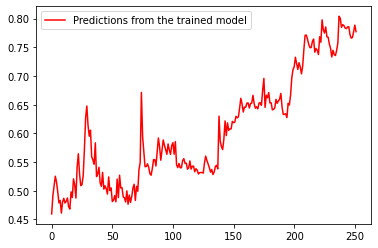

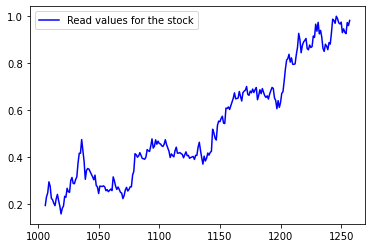

In [149]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='red', label='Predictions from the trained model')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='blue', label='Read values for the stock')
plt.legend(loc='upper left')
plt.show()

In [122]:
print(Y_test)

             2
1006  0.358860
1007  0.366793
1008  0.370168
1009  0.366600
1010  0.342809
...        ...
1253  0.997196
1254  0.995642
1255  1.000000
1256  0.993317
1257  0.992907

[252 rows x 1 columns]
